# Análise da Infraestrutura das Escolas do Município

Nesta atividade, vamos analisar a infraestrutura disponível das escolas do município de São Paulo, com base nas 12 variáveis selecionadas pela equipe. A análise será focada principalmente nos percentuais de escolas que possuem cada um dos recursos de infraestrutura selecionados (por exemplo: % de escolas com quadra, % de escolas com internet, etc).

Também deveremos propor um indicador-resumo que represente a infraestrutura das escolas, levando em consideração os recursos disponíveis em cada uma delas. As escolas serão classificadas hierarquicamente com base neste indicador.

Finalmente, será realizada uma análise descritiva deste indicador, abordando medidas centrais (média e mediana) e medidas de dispersão (desvio-padrão e coeficiente de variação). Será também apresentada uma representação gráfica para facilitar a compreensão dos dados.

## Importação das Bibliotecas

Para essa análise, vamos utilizar as bibliotecas `pandas`, `numpy`, `matplotlib` e `docx`. Essas ferramentas nos ajudarão a carregar os dados, realizar os cálculos e gerar os gráficos e o documento final.

- `pandas`: para manipulação e análise de dados.
- `numpy`: para operações numéricas.
- `matplotlib`: para geração de gráficos.
- `seaborn`: para criação de gráficos estatísticos e visualizações aprimoradas.
- `docx`: para criação do relatório no formato Word.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
from docx.shared import Inches,Pt
pd.set_option('future.no_silent_downcasting', True)

## Preparação dos Dados

Carregamos os dados das escolas de São Paulo, ajustamos os nomes das colunas para facilitar a leitura e selecionamos as variáveis relevantes, como infraestrutura e número de matrículas. Também tratamos valores ausentes e ajustamos algumas colunas para garantir a consistência dos dados.

In [2]:
df = pd.read_csv('microdados_ed_basica_2023_sp.csv', encoding='windows 1252')
df.columns = [
    column.replace('TP_', '').replace('IN_', '').replace('QT_', 'QUANTIDADE_').replace('_MAT_BAS','_MATRICULAS_BASICAS')
    for column in df.columns
]
df = df[['SITUACAO_FUNCIONAMENTO','ENERGIA_REDE_PUBLICA','BANHEIRO','BIBLIOTECA','LABORATORIO_INFORMATICA','QUADRA_ESPORTES','REFEITORIO','QUANTIDADE_SALAS_UTILIZADAS','COMPUTADOR','REDE_LOCAL','QUANTIDADE_MATRICULAS_BASICAS','SALA_PROFESSOR','ALIMENTACAO']]

# Situação de funcionamento
df['SITUACAO_FUNCIONAMENTO'] = df['SITUACAO_FUNCIONAMENTO'].replace({
    1: 'Ativa', 
    2: 'Paralisada', 
    3: 'Extinta', 
    4: 'Extinta'
})
# Abastecimento de energia elétrica - Rede pública
df['ENERGIA_REDE_PUBLICA'] = df['ENERGIA_REDE_PUBLICA'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Dependências físicas existentes e utilizadas na escola - Banheiro 
df['BANHEIRO'] = df['BANHEIRO'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Dependências físicas existentes e utilizadas na escola - Biblioteca 
df['BIBLIOTECA'] = df['BIBLIOTECA'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Dependências físicas existentes e utilizadas na escola - Laboratório de informática 
df['LABORATORIO_INFORMATICA'] = df['LABORATORIO_INFORMATICA'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Dependências físicas existentes e utilizadas na escola - Quadra de esportes
df['QUADRA_ESPORTES'] = df['QUADRA_ESPORTES'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Dependências físicas existentes e utilizadas na escola - Refeitório
df['REFEITORIO'] = df['REFEITORIO'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Número de salas de aula utilizadas na escola (dentro e fora do prédio)
df['QUANTIDADE_SALAS_UTILIZADAS'] = df['QUANTIDADE_SALAS_UTILIZADAS'].fillna(0).astype(int)

# Disponibilidade de computador
df['COMPUTADOR'] = df['COMPUTADOR'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Tipo de rede local
df['REDE_LOCAL'] = df['REDE_LOCAL'].replace({
    0: 'Nenhuma',
    1: 'A Cabo',
    2: 'Wireless',
    3: 'Ambas',
    9: 'Não informado'
})

# Número de Matrículas da Educação Básica
df['QUANTIDADE_MATRICULAS_BASICAS'] = df['QUANTIDADE_MATRICULAS_BASICAS'].fillna(0).astype(int)

# Sala de professor
df['SALA_PROFESSOR'] = df['SALA_PROFESSOR'].replace({
    0: 'Não', 
    1: 'Sim', 
})

# Alimentação
df['ALIMENTACAO'] = df['ALIMENTACAO'].replace({
    0: 'Não', 
    1: 'Sim', 
})

columns_categorical = [
    'SITUACAO_FUNCIONAMENTO', 
    'REDE_LOCAL'
]

columns_quantitative = [
    'QUANTIDADE_SALAS_UTILIZADAS', 
    'QUANTIDADE_MATRICULAS_BASICAS'
]

columns_binary = [
    'ENERGIA_REDE_PUBLICA',
    'BANHEIRO', 
    'BIBLIOTECA', 
    'LABORATORIO_INFORMATICA', 
    'QUADRA_ESPORTES', 
    'REFEITORIO', 
    'COMPUTADOR', 
    'SALA_PROFESSOR', 
    'ALIMENTACAO'
]

total = len(df)

## Correlação entre variáveis
Nessa análise, foram calculadas as correlações entre diversas variáveis relacionadas à infraestrutura escolar, como energia elétrica, biblioteca, quadra de esportes, entre outras. As variáveis categóricas foram convertidas em valores numéricos para facilitar a interpretação das correlações, ajudando a identificar padrões e relações entre os diferentes fatores presentes nas escolas.

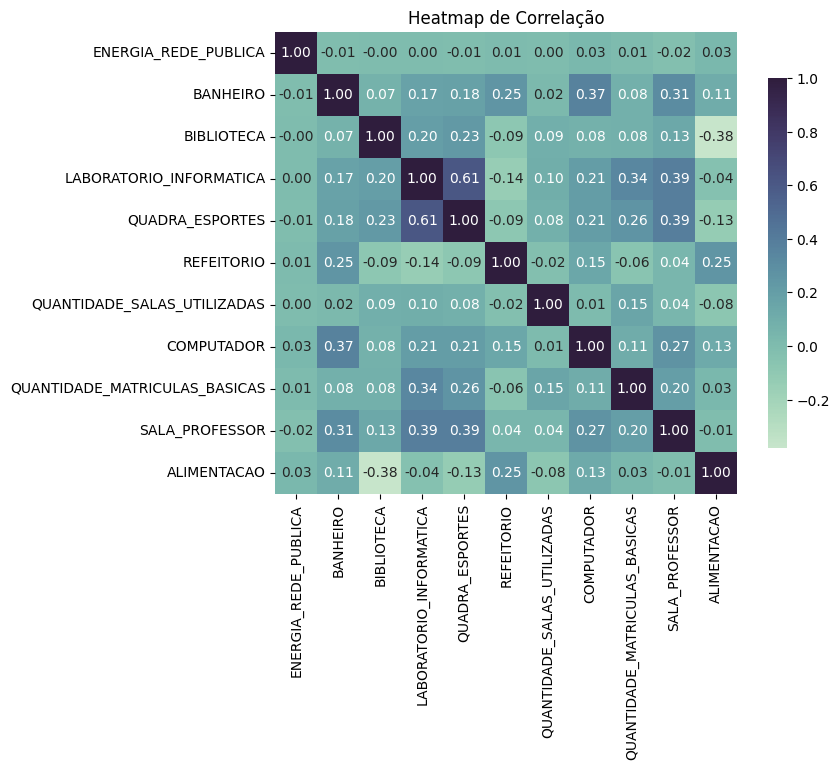

In [3]:
df_to_corr = df[['ENERGIA_REDE_PUBLICA','BANHEIRO','BIBLIOTECA','LABORATORIO_INFORMATICA','QUADRA_ESPORTES','REFEITORIO','QUANTIDADE_SALAS_UTILIZADAS','COMPUTADOR','QUANTIDADE_MATRICULAS_BASICAS','SALA_PROFESSOR','ALIMENTACAO']].replace('Sim',1).replace("Não",0).replace({
    'Nenhuma': 0,
    'Não informado':0,
    'A Cabo':1,
    'Wireless':2,
    'Ambas':3,}).replace({
    'Extinta':0, 
    'Paralisada':1,
    'Ativa':2, }).corr()

plt.figure(figsize=(8, 6))

sns.heatmap(df_to_corr, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(start=.5, rot=-0.6, as_cmap=True), square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap de Correlação')
plt.savefig('correlacao.png', bbox_inches = 'tight')
plt.show()

## Boxplot das Variáveis Quantitativas

O gráfico a seguir apresenta a distribuição das variáveis quantitativas, como o número de salas utilizadas e de matrículas, para as escolas da base de dados. Ele ajuda a entender a dispersão e identificar possíveis outliers em cada variável.

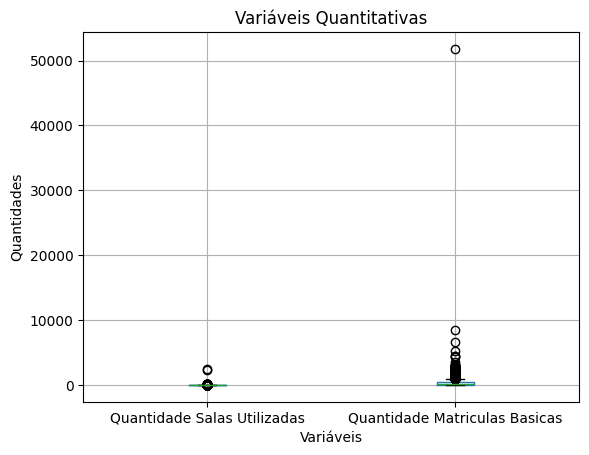

In [4]:
df.boxplot(column=columns_quantitative)
plt.title('Variáveis Quantitativas')
plt.xticks(ticks=[1, 2], labels=[x.title().replace("_"," ").title().replace("_"," ") for x in columns_quantitative])
plt.xlabel('Variáveis')
plt.ylabel('Quantidades')
plt.savefig('QUANTITATIVAS.png')
plt.show()

## Classificação por Porte de Matrícula e Remoção de Outliers

Neste processo, duas etapas são realizadas:

1. **Classificação por Porte de Matrícula:** A função `quartil_classification` classifica as escolas em categorias de porte (Baixo, Médio, Grande, Muito Grande) com base na quantidade de matrículas. A classificação é determinada pelos quartis da variável `QUANTIDADE_MATRICULAS_BASICAS`, e uma nova variável `PORTE` é criada para armazenar esses valores.

2. **Remoção de Outliers nas Variáveis Quantitativas:** Para cada variável quantitativa, aplicamos o método de **IQR (Intervalo Interquartil)** para identificar e remover outliers. Calculamos os quartis (Q1 e Q3), determinamos os limites superior e inferior, e filtramos os dados para excluir valores que estão fora desse intervalo. Essa etapa ajuda a limpar os dados e melhorar a precisão da análise.


In [5]:
def quartil_classification(valor):
    quartile = df['QUANTIDADE_MATRICULAS_BASICAS'].quantile([0.25, 0.5, 0.75])
    if valor <= quartile[0.25]:
        return 'Baixo'
    elif valor <= quartile[0.5]:
        return 'Médio'
    elif valor <= quartile[0.75]:
        return 'Grande'
    else:
        return 'Muito Grande'

df['PORTE'] = df['QUANTIDADE_MATRICULAS_BASICAS'].apply(quartil_classification)


In [6]:
for index, column in enumerate(columns_quantitative):
    filtered_df = df[df[column] > 0]

    Q1 = filtered_df[column].quantile(0.25)
    Q3 = filtered_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]

### Análise Descritiva das Variáveis Quantitativas

Foi calculada uma série de estatísticas descritivas para cada variável quantitativa. As métricas incluem a média, quartis, mediana, mínimo, máximo, desvio padrão e coeficiente de variação, que fornecem uma visão geral do comportamento dos dados.

In [7]:
list_quantitative_table_descriptive =[]
for index, column in enumerate(columns_quantitative):
    table = pd.DataFrame({
        'Média': [df[column].mean()],
        'Quartil 1 (25%)': df[column].quantile(0.25),
        'Mediana (50%)': [df[column].median()],
        'Quartil 3 (75%)':df[column].quantile(0.75),
        'Mínimo': [df[column].min()],
        'Máximo': [df[column].max()],
        'Desvio Padrão': [df[column].std()],
        'Coeficiente de Variação': [(df[column].std() / df[column].mean()) * 100],
    }, index=[column])

    list_quantitative_table_descriptive.append(table.round(decimals=2))

    display(list_quantitative_table_descriptive[index])

,Média,Quartil 1 (25%),Mediana (50%),Quartil 3 (75%),Mínimo,Máximo,Desvio Padrão,Coeficiente de Variação
QUANTIDADE_SALAS_UTILIZADAS,11.13,5.0,9.0,14.0,0,2378,37.13,333.54


,Média,Quartil 1 (25%),Mediana (50%),Quartil 3 (75%),Mínimo,Máximo,Desvio Padrão,Coeficiente de Variação
QUANTIDADE_MATRICULAS_BASICAS,316.03,60.0,142.0,426.0,0,51791,701.44,221.96


### Análise de Frequência das Variáveis Categóricas

Foram calculadas as frequências absolutas e relativas (em porcentagem) para cada variável categórica. A tabela gerada mostra a distribuição de cada categoria nas variáveis selecionadas.

In [8]:
list_categorical_table_descriptive =[]
for index, column in enumerate(columns_categorical):
    df_categorical_table_frequency = df[column].value_counts().reset_index(name='FREQUENCIA_ABSOLUTA')

    df_categorical_table_frequency['FREQUENCIA_RELATIVA (%)'] = (df_categorical_table_frequency['FREQUENCIA_ABSOLUTA'] / total * 100).round(2)

    df_categorical_table_frequency.sort_values(by=[column], inplace=True)

    list_categorical_table_descriptive.append(df_categorical_table_frequency.round(decimals=2))

    display(list_categorical_table_descriptive[index])

,SITUACAO_FUNCIONAMENTO,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
0,Ativa,7252,85.83
1,Extinta,610,7.22
2,Paralisada,587,6.95


,REDE_LOCAL,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
0,A Cabo,3432,40.62
1,Ambas,2301,27.23
3,Nenhuma,496,5.87
2,Não informado,609,7.21
4,Wireless,414,4.90


### Análise do Porte das Escolas e Salas Utilizadas

Nesta análise, as escolas foram classificadas de acordo com o porte (quantidade de matrículas) e, para cada categoria, foi calculada a média de salas utilizadas. Também foram analisadas as escolas sem salas utilizadas e a situação de funcionamento dessas escolas.

In [9]:
sizes = ['Pequeno','Médio','Grande','Muito Grande']
results = []
for size in sizes:
    mean_value = round(df[df['PORTE'] == size]['QUANTIDADE_SALAS_UTILIZADAS'].fillna(0).mean(), 2)
    results.append({'Porte': size, 'Média Salas Utilizadas': mean_value})

results_df = pd.DataFrame(results)

display(results_df)

sum = 0

for i in df[df['PORTE'] == size]['QUANTIDADE_SALAS_UTILIZADAS']:
    sum =+ i

print('Média Salas Utilizadas - Pequeno ', round(sum/len(df[df['PORTE'] == size]['QUANTIDADE_SALAS_UTILIZADAS']),2))

print('\nPorcentagem de escolas sem salas', round(len(df[df['QUANTIDADE_SALAS_UTILIZADAS'] == 0])/total * 100,2),'%, dessas:')

display(df[df['QUANTIDADE_SALAS_UTILIZADAS'] == 0]['SITUACAO_FUNCIONAMENTO'].value_counts())

,Porte,Média Salas Utilizadas
0,Pequeno,NaN
1,Médio,8.38
2,Grande,12.06
3,Muito Grande,20.68


Média Salas Utilizadas - Pequeno  0.05

Porcentagem de escolas sem salas 14.17 %, dessas:


SITUACAO_FUNCIONAMENTO
Extinta       610
Paralisada    587
Name: count, dtype: int64

### Análise Descritiva das Variáveis Binárias

A seguir, apresentamos as tabelas de frequências absolutas e relativas para as variáveis binárias presentes no dataset. Cada variável binária foi analisada com base no número de ocorrências e na distribuição percentual de seus valores.

In [10]:
list_binary_table_descriptive =[]
for index, column in enumerate(columns_binary):
    df_binary_table_frequency = df[column].value_counts().reset_index(name='FREQUENCIA_ABSOLUTA')

    df_binary_table_frequency['FREQUENCIA_RELATIVA (%)'] = (df_binary_table_frequency['FREQUENCIA_ABSOLUTA'] / total * 100).round(2)

    df_binary_table_frequency.sort_values(by=[column], inplace=True)

    list_binary_table_descriptive.append(df_binary_table_frequency.round(decimals=2))

    display(list_binary_table_descriptive[index])

,ENERGIA_REDE_PUBLICA,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
1,Não,6,0.07
0,Sim,7246,85.76


,BANHEIRO,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
1,Não,467,5.53
0,Sim,6785,80.31


,BIBLIOTECA,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
0,Não,6115,72.38
1,Sim,1137,13.46


,LABORATORIO_INFORMATICA,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
0,Não,4711,55.76
1,Sim,2541,30.07


,QUADRA_ESPORTES,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
0,Não,3985,47.17
1,Sim,3267,38.67


,REFEITORIO,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
1,Não,1825,21.60
0,Sim,5427,64.23


,COMPUTADOR,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
1,Não,592,7.01
0,Sim,6660,78.83


,SALA_PROFESSOR,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
1,Não,2070,24.50
0,Sim,5182,61.33


,ALIMENTACAO,FREQUENCIA_ABSOLUTA,FREQUENCIA_RELATIVA (%)
1,Não,1886,22.32
0,Sim,5366,63.51


In [11]:
for index, column in enumerate(columns_binary):
        counts = pd.crosstab(df['PORTE'], df[column], margins=False)
        counts['RATIO']=counts['Sim']/(counts['Não']+counts['Sim'])
        display(counts)

ENERGIA_REDE_PUBLICA,Não,Sim,RATIO
PORTE,,,
Baixo,0,934,1.000000
Grande,4,2111,0.998109
Muito Grande,0,2109,1.000000
Médio,2,2092,0.999045


BANHEIRO,Não,Sim,RATIO
PORTE,,,
Baixo,163,771,0.825482
Grande,108,2007,0.948936
Muito Grande,21,2088,0.990043
Médio,175,1919,0.916428


BIBLIOTECA,Não,Sim,RATIO
PORTE,,,
Baixo,754,180,0.192719
Grande,1774,341,0.161229
Muito Grande,1686,423,0.200569
Médio,1901,193,0.092168


LABORATORIO_INFORMATICA,Não,Sim,RATIO
PORTE,,,
Baixo,848,86,0.092077
Grande,1482,633,0.299291
Muito Grande,419,1690,0.801328
Médio,1962,132,0.063037


QUADRA_ESPORTES,Não,Sim,RATIO
PORTE,,,
Baixo,708,226,0.241970
Grande,1196,919,0.434515
Muito Grande,328,1781,0.844476
Médio,1753,341,0.162846


REFEITORIO,Não,Sim,RATIO
PORTE,,,
Baixo,321,613,0.656317
Grande,486,1629,0.770213
Muito Grande,679,1430,0.678046
Médio,339,1755,0.838109


COMPUTADOR,Não,Sim,RATIO
PORTE,,,
Baixo,224,710,0.760171
Grande,108,2007,0.948936
Muito Grande,9,2100,0.995733
Médio,251,1843,0.880134


SALA_PROFESSOR,Não,Sim,RATIO
PORTE,,,
Baixo,529,405,0.433619
Grande,483,1632,0.771631
Muito Grande,68,2041,0.967757
Médio,990,1104,0.527221


ALIMENTACAO,Não,Sim,RATIO
PORTE,,,
Baixo,501,433,0.463597
Grande,543,1572,0.743262
Muito Grande,407,1702,0.807018
Médio,435,1659,0.792264


### Análise da Distribuição das Variáveis Quantitativas

Nesta seção, são apresentados os histogramas que ilustram a distribuição das variáveis quantitativas do dataset. As variáveis foram agrupadas em intervalos (bins) para facilitar a visualização das frequências relativas. Cada gráfico mostra a porcentagem de valores dentro de cada intervalo, proporcionando uma análise clara da dispersão e concentração dos dados.

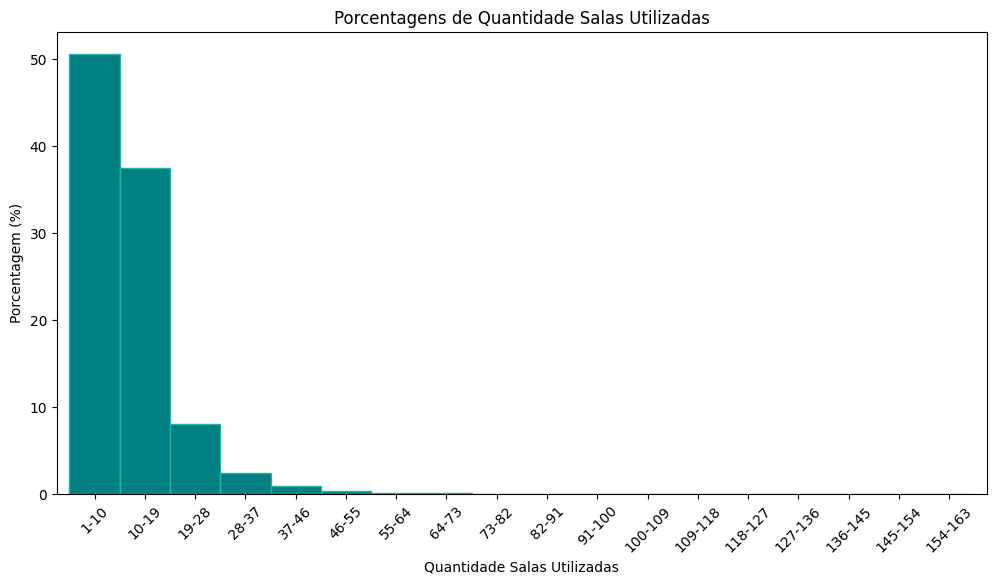

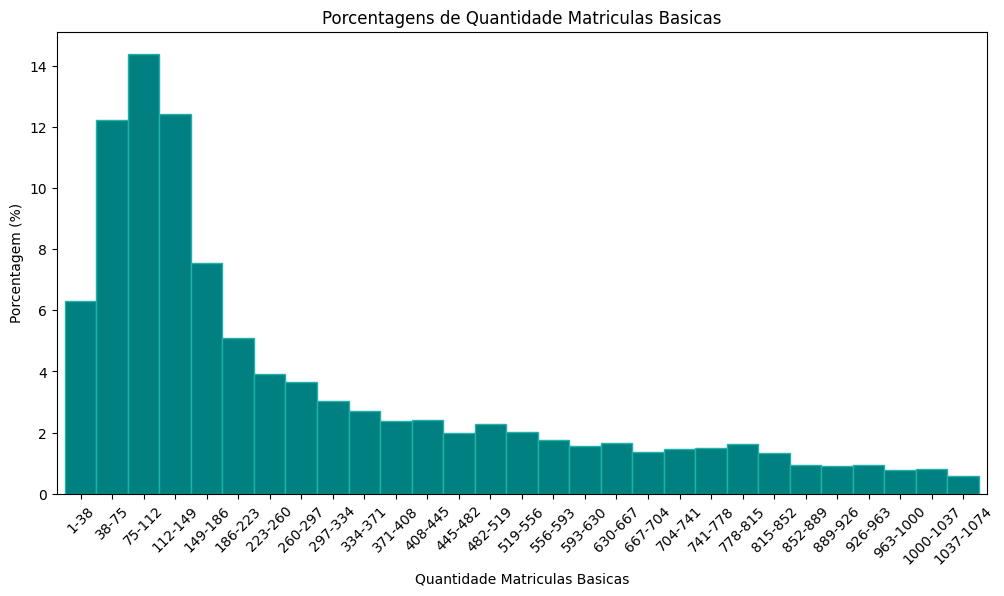

In [12]:
list_image_path_quantitative = []
for index, column in enumerate(columns_quantitative):
    number_of_bins = int(len(df[column].unique())/np.sqrt(len(df[column].unique())))
    bins = range(1,filtered_df[column].max(),number_of_bins)
    labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

    filtered_df['Binned'] = pd.cut(filtered_df[column], bins=bins, labels=labels, right=False)

    bin_counts = (filtered_df['Binned'].value_counts().sort_index())/len(filtered_df) * 100

    plt.figure(figsize=(12, 6))
    bin_counts.plot(kind='bar', width=1, color='teal', edgecolor='Lightseagreen')
    plt.title('Porcentagens de ' + column.title().replace("_"," ").title().replace("_"," "))
    plt.xlabel(column.title().replace("_"," ").title().replace("_"," "))
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=45)

    list_image_path_quantitative.append(column+'.png')
    plt.savefig(list_image_path_quantitative[index], bbox_inches = 'tight')
    plt.show()

### Análise das Variáveis Categóricas

Nesta seção, são apresentados os gráficos de barras que ilustram a distribuição das variáveis categóricas do dataset. Para cada variável, mostramos a porcentagem de ocorrências de cada categoria. Os gráficos ajudam a identificar a frequência relativa de cada valor nas variáveis categóricas.

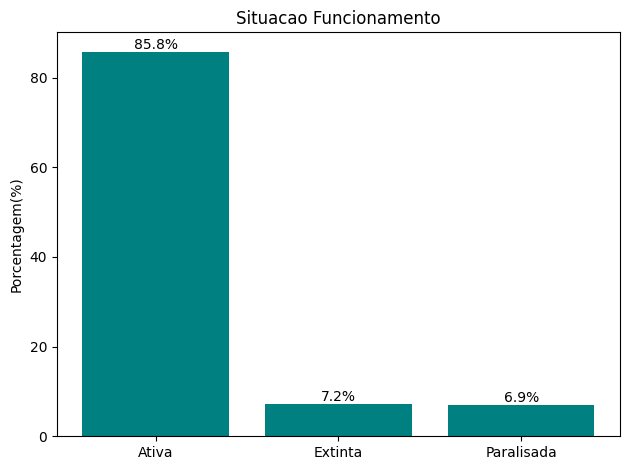

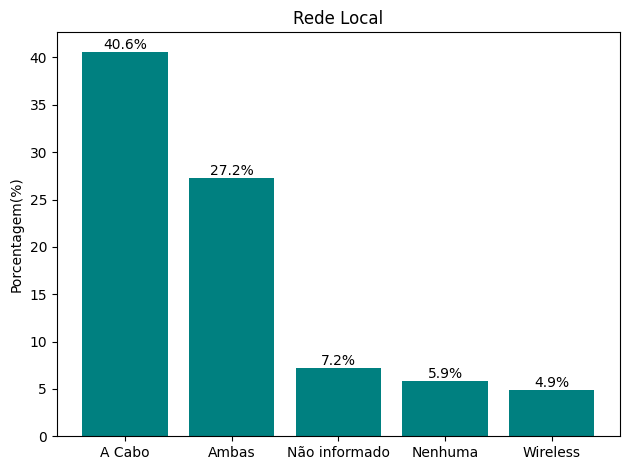

In [13]:
list_image_path_categorical = []
for index, column in enumerate(columns_categorical):
    counting = df[column].value_counts()/ total * 100

    fig, ax = plt.subplots()
    bars = plt.bar(counting.index.astype(str), counting.values, color=['teal'])
    plt.title(column.title().replace("_"," ").title().replace("_"," "))
    plt.ylabel('Porcentagem(%)')
    plt.tight_layout()

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

    list_image_path_categorical.append(column+'.png')
    plt.savefig(list_image_path_categorical[index])
    plt.show()

### Análise das Variáveis Binárias

Nesta seção, são apresentados gráficos de barras que mostram a distribuição das variáveis binárias, com as porcentagens de ocorrências de cada categoria (0 e 1). Os gráficos ajudam a entender a proporção de escolas que possuem ou não determinadas características.

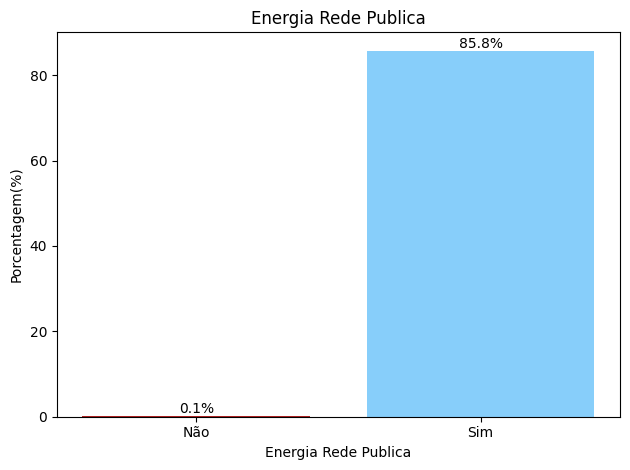

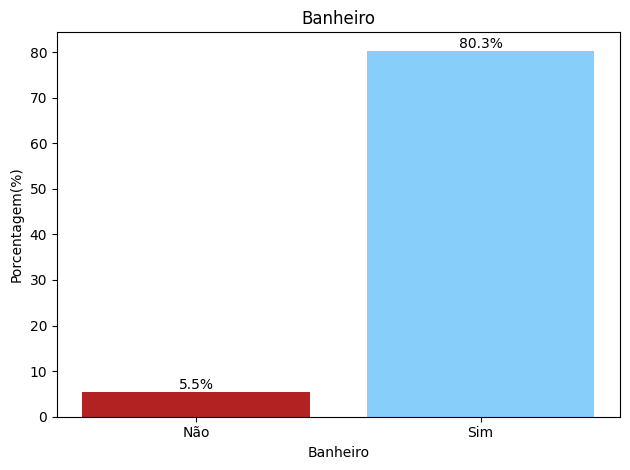

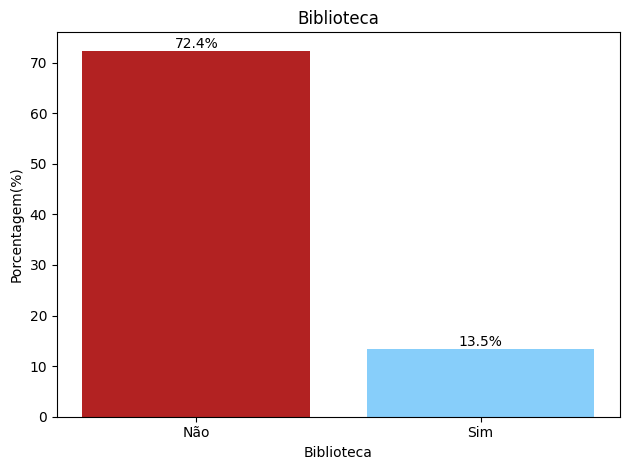

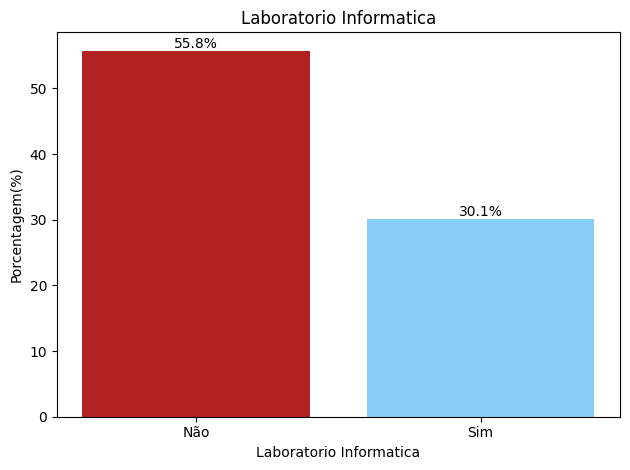

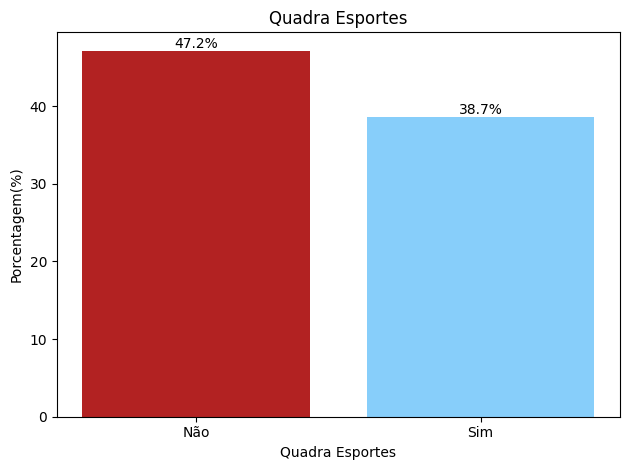

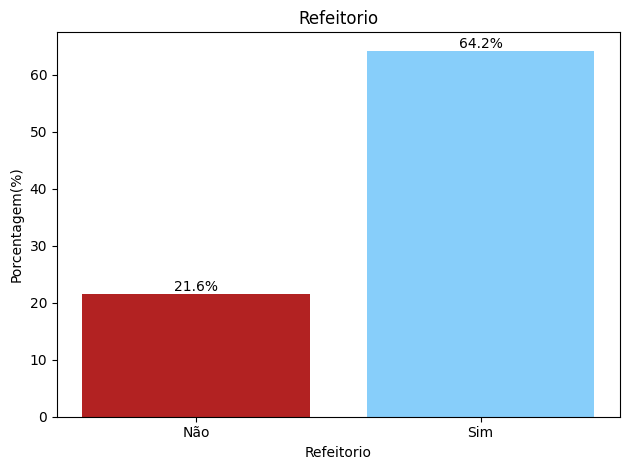

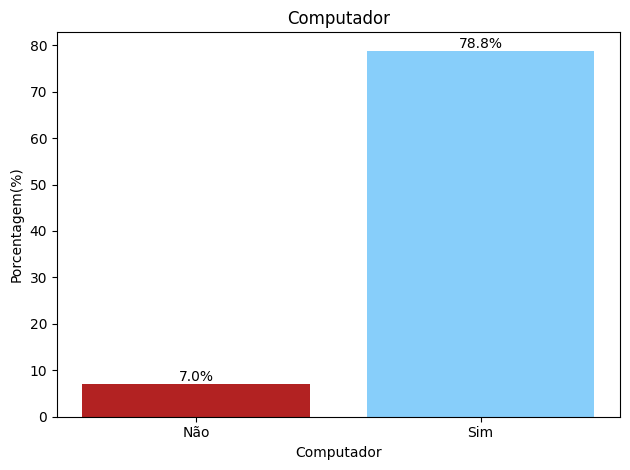

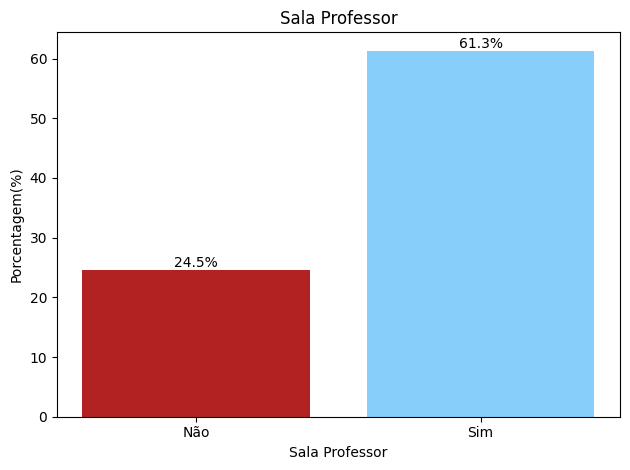

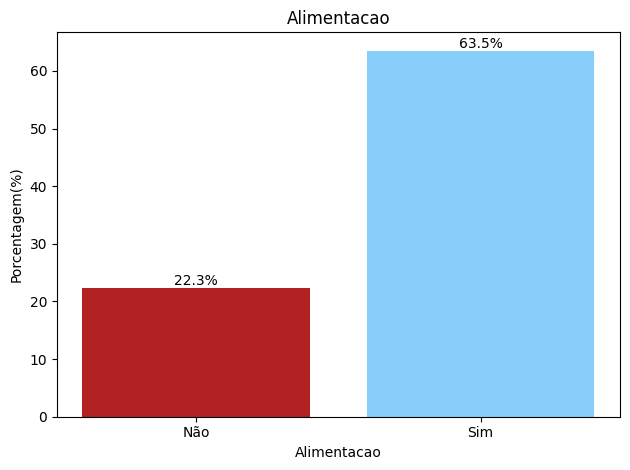

In [14]:
list_image_path_binary = []
for index, column in enumerate(columns_binary):
    counting = df[column].value_counts().sort_index()/ total * 100

    fig, ax = plt.subplots()
    bars = plt.bar(counting.index.astype(str), counting.values, color=['FireBrick', 'LightSkyBlue'])
    plt.title(column.title().replace("_"," ").title().replace("_"," "))
    plt.xlabel(column.title().replace("_"," "))
    plt.ylabel('Porcentagem(%)')
    plt.tight_layout()

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

    list_image_path_binary.append(column+'.png')
    plt.savefig(list_image_path_binary[index])
    plt.show()

### Análise da Relação entre o Porte e Variáveis Binárias

Nesta seção, exploramos a relação entre o porte das escolas (tamanho das matrículas) e as variáveis binárias. Para cada variável binária, apresentamos gráficos de barras empilhadas, com a porcentagem de escolas de cada porte que possuem ou não a característica em análise.

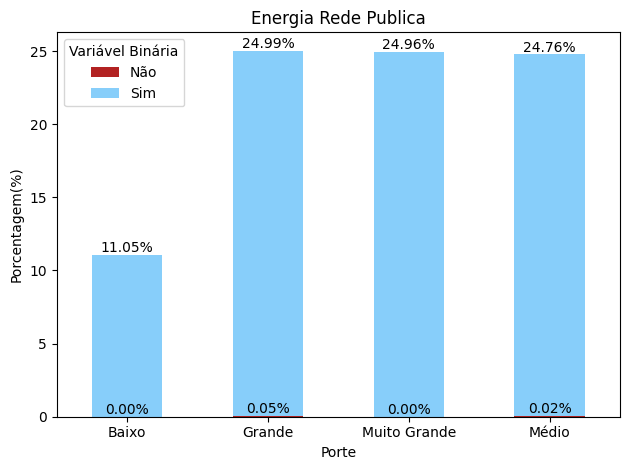

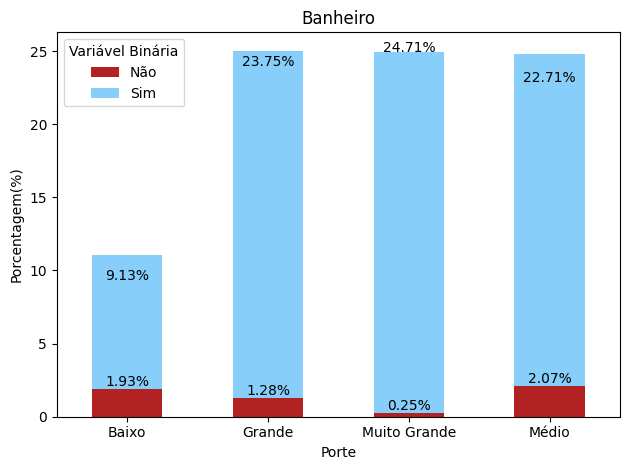

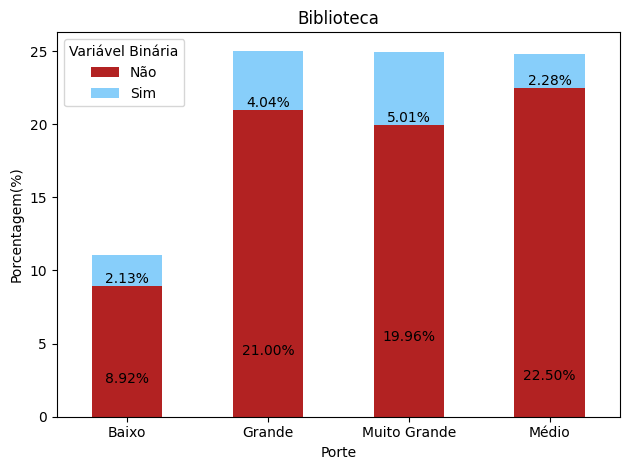

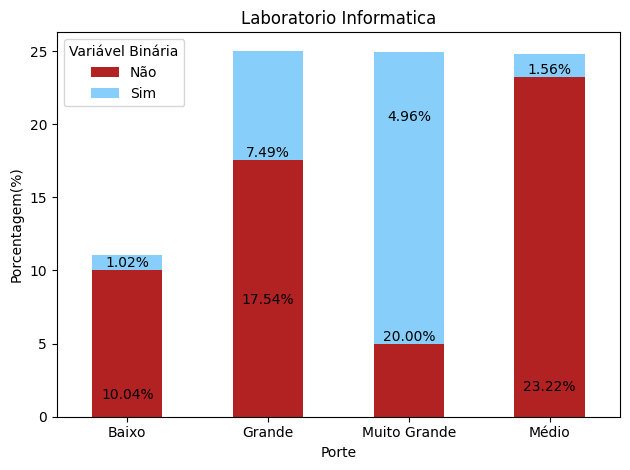

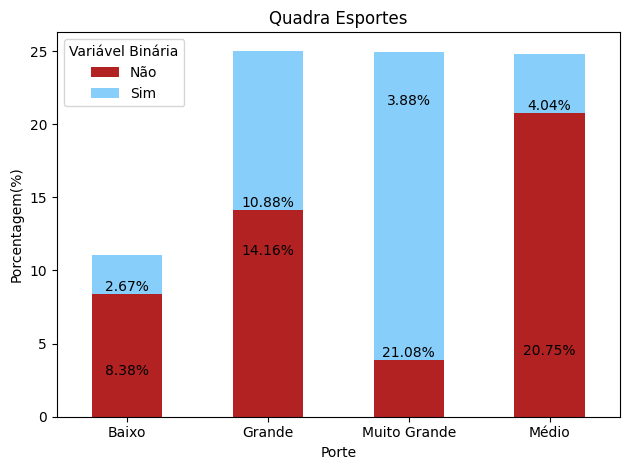

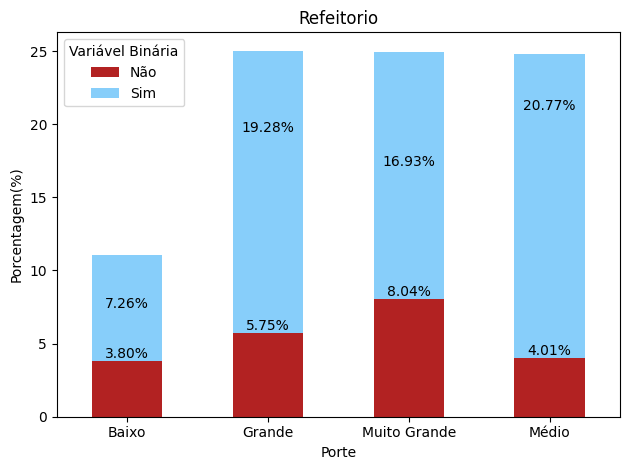

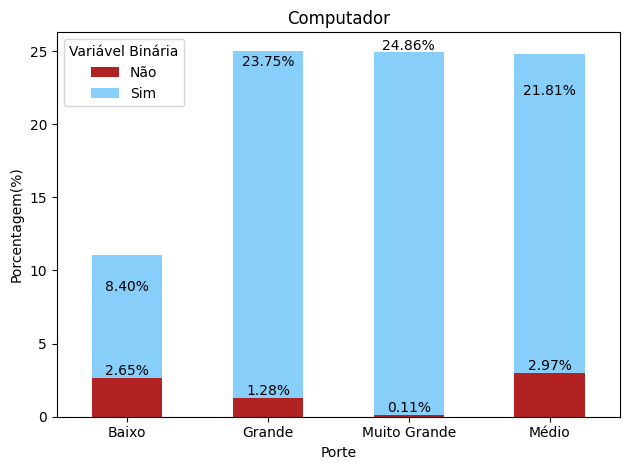

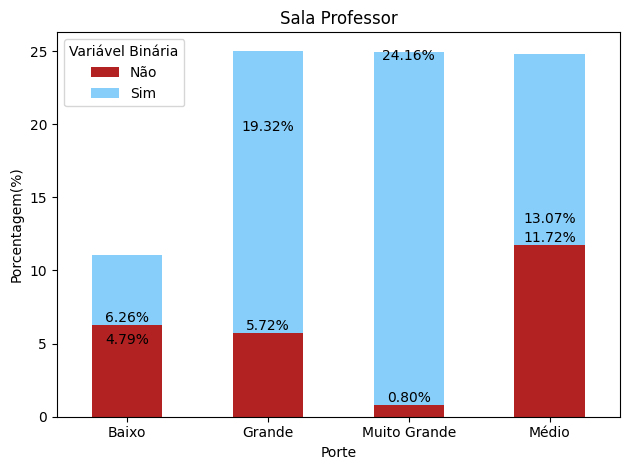

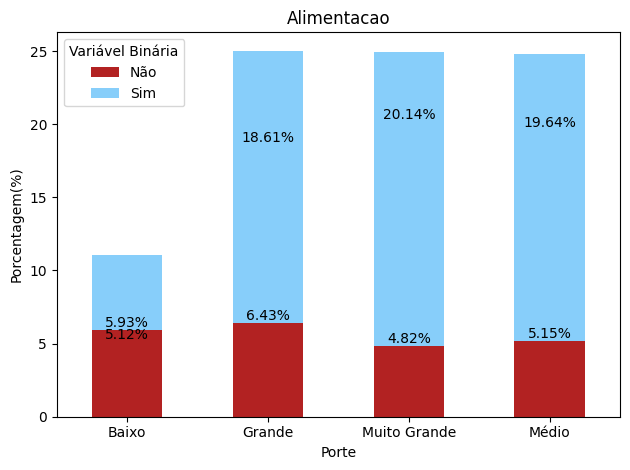

In [15]:
for index, column in enumerate(columns_binary):

    counts = pd.crosstab(df['PORTE'], df[column], margins=False)/total*100

    ax = counts.plot(kind='bar', stacked=True, color=['FireBrick', 'LightSkyBlue'])

    if column in ['BIBLIOTECA','LABORATORIO_INFORMATICA','QUADRA_ESPORTES']:
        labels = [ax.patches[4].get_height(),ax.patches[5].get_height(),ax.patches[6].get_height(),ax.patches[7].get_height(),ax.patches[0].get_height(),ax.patches[1].get_height(),ax.patches[2].get_height(),ax.patches[3].get_height()]

    for i,p in enumerate(ax.patches):
        if column in ['BIBLIOTECA','LABORATORIO_INFORMATICA','QUADRA_ESPORTES']:
            ax.annotate(f'{labels[i]:.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')
        else:
            ax.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')

    plt.title(column.title().replace("_"," ").title().replace("_"," "))
    plt.xlabel('Porte')
    plt.ylabel('Porcentagem(%)')
    plt.xticks(rotation=0)
    plt.legend(title='Variável Binária', labels=['Não', 'Sim'])
    plt.tight_layout()
    plt.savefig('SIZE_'+list_image_path_binary[index])
    plt.show()

## Análise dos Resultados

A análise revelou algumas tendências chave sobre a infraestrutura das escolas:

- **7,2% das escolas extintas** e **6,9% paralisadas**, afetando a oferta educacional.
- Mais de **75% das escolas têm internet**, mas apenas **34,4% têm acesso wireless**.
- **5,5% das escolas não possuem banheiros**, principalmente em escolas de **médio porte**.
- **72% das escolas não têm biblioteca**, com maior incidência em **escolas de grande porte**.
- **80% das escolas muito grandes** têm **laboratórios de informática**, enquanto **6% das de médio porte** possuem esse recurso.
- **85% das escolas muito grandes** têm **quadras esportivas**, enquanto **16% das escolas de médio porte**.
- A **média de salas de aula utilizadas** varia: 0,05 (pequenas), 8,38 (médias), 12,06 (grandes) e 20,68 (muito grandes).
- A presença de **refeitórios** é inversamente proporcional ao porte das escolas.

Apesar de **85.76% das escolas terem eletricidade**, escolas menores ainda enfrentam desafios com recursos como **alimentação escolar**, **salas de informática** e **infraestrutura esportiva**.

## Geração do Relatório no Word

Após a análise e a construção dos gráficos, criamos um relatório em formato Word utilizando a biblioteca `python-docx`. O relatório inclui:

- Análise de correlação entre variáveis.
- Análise das segmentações por porte das escolas.
- Tabelas descritivas.
- Histogramas eGráficos de distribuição.

O relatório será salvo como `caracterizacao_escolas_2.docx`.

In [16]:
doc = Document()
doc.add_heading('Caracterização das Escolas do Município de São Paulo', level=0)

doc.add_heading('Indicador-Resumo', level=1)

doc.add_picture('correlacao.png', width=Inches(6.4))

doc.add_paragraph("""
A fim de criar um heatmap de correlação, as variáveis categóricas foram quantificadas. Respostas binárias foram codificadas como "Sim" com valor 1 e "Não" com valor 0. No tipo de rede, "Nenhuma" e "Não informado" receberam o valor 0, "A Cabo" o valor 1, "Wireless" o valor 2, uma vez que essa tecnologia oferece mais flexibilidade e acessibilidade em comparação com a conexão a cabo, e "Ambas" o valor 3. Quanto à situação das unidades, "Extinta" foi representada por 0, "Paralisada" por 1 e "Ativa" por 2. As maiores correlações observadas foram: presença de laboratório de informática e quadra de esportes (0,61); laboratório de informática e sala de professores, e quadra de esportes e sala de professores (0,39); presença de banheiros e quantidade de computadores (0,37); laboratório de informática e quantidade de matrículas (0,34); e banheiro e sala de professores (0,31).

A associação entre a presença de um laboratório de informática e outras amenidades, juntamente com a correlação entre a quantidade de matrículas e escolas que possuem laboratórios de informática, fortalece a justificativa para a escolha da quantidade de matrículas como indicador-resumo.

As escolas foram segmentadas, baseando-se nos quartis da quantidade de matrículas, em diferentes portes: pequeno, médio, grande e muito grande. É importante considerar que os 14.18% das escolas extintas ou paralisadas não possuem salas ativas e estão incluídas entre as escolas de pequeno porte.
""")
doc.add_heading('Dados', level=1)
doc.add_heading('Variáveis Quantitativas', level=2)
doc.add_picture('QUANTITATIVAS.png', width=Inches(6.4))
doc.add_paragraph("""
As variáveis de quantidade de matrículas e quantidade de salas utilizadas contêm valores atípicos que distorcem a análise. Para garantir maior precisão, utilizou-se o método do Intervalo Interquartil (IQR) para removê-los antes de gerar os histogramas
""")
for index, column in enumerate(columns_quantitative):
    doc.add_heading('Presença de '+ column.title().replace("_"," "), level=3)

    table = doc.add_table(rows=1, cols=len(list_quantitative_table_descriptive[index].columns), style='Light List Accent 1')
    hdr_cells = table.rows[0].cells

    for i, column in enumerate(list_quantitative_table_descriptive[index].columns):
        hdr_cells[i].text = column

    for x, row in list_quantitative_table_descriptive[index].iterrows():
        row_cells = table.add_row().cells
        for i, value in enumerate(row):
            row_cells[i].text = str(value)
    
    doc.add_picture(list_image_path_quantitative[index], width=Inches(6.4))

doc.add_heading('Variáveis Categóricas', level=2)

for index, column in enumerate(columns_categorical):
    doc.add_heading(column.title().replace("_"," "), level=3)
    doc.add_picture(list_image_path_categorical[index], width=Inches(6.4))

for index, column in enumerate(columns_binary):
    doc.add_heading('Presença de '+ column.title().replace("_"," "), level=3)
    doc.add_picture(list_image_path_binary[index], width=Inches(6.4))
    doc.add_picture('SIZE_'+list_image_path_binary[index], width=Inches(6.4))

doc.add_heading('Análise', level=1)

doc.add_paragraph("""
Observou-se que 7,2% das escolas foram extintas e 6,9% estão paralisadas, impactando a oferta educacional.
Mais de 75% das escolas têm acesso à internet, mas apenas 34.4% possuem acesso wireless. Apenas 0,1% das escolas não têm eletricidade, um dado positivo. Em relação aos banheiros, 5,5% das escolas não têm esse recurso, com maior incidência em escolas de médio porte. Mais de 72% das escolas não possuem bibliotecas, sendo que as de grande porte têm a maior proporção (20%) e as de médio porte a menor (9%) é possível que a internet tenha tornado bibliotecas uma prioridade secundária e escolas maiores tenham acesso mais confiável à rede. Especialmente porque escolas de médio porte possuem a maior ocorrência e essas frequentemente se mostraram como a segmentação com menos recursos. 
Quanto aos laboratórios de informática, as escolas muito grandes (80%) apresentam a maior proporção, seguidas pelas grandes (30%), enquanto as de médio porte têm a menor (6%). O mesmo padrão se aplica às quadras esportivas, com 85% das instituições muito grandes, 43% das grandes e 16% das escolas com médio porte. Isso indica que escolas que não são de porte muito grande tem uma infraestrutura menos apropriada para disponibilizar elementos escolares além de aulas padrões, resultando em matérias como Educação física ou informática não sendo ensinadas nessas instituições, 40% das escolas possuindo apenas rede local via cabo pode resultar em alunos sem acesso à internet.
A análise das salas de professores mostra que a proporção de cada categoria aumenta com o tamanho das instituições, com valores de 43%, 52%, 77% e 96%. A média de salas de aula utilizadas também varia conforme o porte: 0,05 em escolas pequenas, 8,38 em médias, 12,06 em grandes e 20,68 em muito grandes, evidenciando ainda mais que instituições maiores possuem mais recursos. 
Em contrapartida, a presença de um refeitório na escola aparenta ser inversamente proporcional ao seu porte, com a maior porcentagem de escolas sem refeitório sendo as de grande porte (8.04%), enquanto as de baixo porte apresentam menos escolas com ausência de refeitórios (3.80%). Nossos dados indicam que é mais comum as escolas de porte médio com ausência alimentar (6.43%), e as de grande porte são menos comuns (4.82%).
Apenas 0.01% das escolas não tem acesso a eletricidade, isso demonstra não só a urbanização da capital de São Paulo quase todas as escolas, incluindo de porte pequeno, tem acesso à tecnologia contemporânea. Contudo, mesmo urbanizado, escolas de porte menores sofrem com falta de certos recursos, incluindo uma quantidade boa de escolas faltando alimentação, salas de computador para uso educativo e alguma área esportiva, em muitas situações, escolas de médio porte possuíam menor incidência da infraestrutura analisada em comparação com escolas de menor porte. É possível que escolas de menor porte tenham mais apoio das comunidades em que elas estejam presentes e, portanto, maior assistência.
""")

doc.save('caracterizacao_escolas_2.docx')